In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [33]:
df=pd.read_csv('/Users/zabihbuda/Desktop/York Universiy files/Data Science /schulich_data_science_1/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Cleaning


In [34]:
#dropping unnecessary columns that are not used in data analysis and modeling
df=df.drop(['date', 'id','zipcode', 'lat', 'long'], axis=1)
#checking if there is any mising values
print(df.isnull().sum())
print('_________________')
print()
print('dataset shape: ', df.shape)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64
_________________

dataset shape:  (21613, 16)


The dataset seems to be clean without missing value but there some columns that contain zero values, such as waterfront, view, sqft_basement, yr_renovated . They needs checked out too. 

In [180]:
df['waterfront'].value_counts()

waterfront
0    21443
1      158
Name: count, dtype: int64

It seems like waterfront is categorical column. So, no need to be cleaned.

In [36]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

The view column is also a categorical columns.

In [37]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

The sqft_basement column will be removed since more than 50% of it is missing.

In [39]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

yr_renovated column will also be removed as it has around 90% zero values. So, it is no use for analysis and modeling.

In [41]:
df=df.drop(['sqft_basement', 'yr_renovated'], axis=1)

## Exploratory Data Analysis

In [43]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,6210.000000,871200.000000


The description shows that the price range is between 75000 to 7,700,000, almost eight million. 

<Axes: >

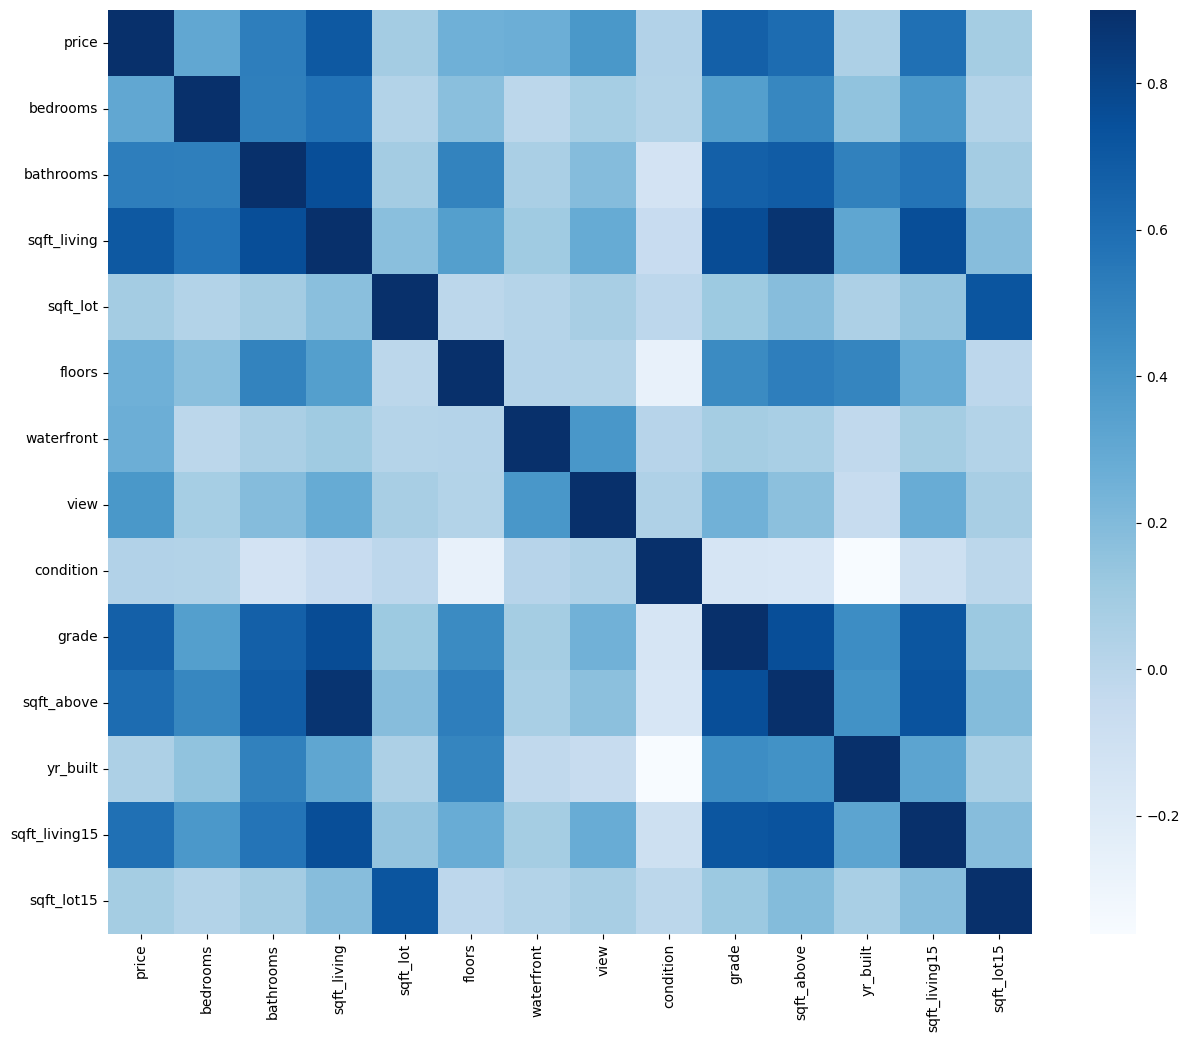

In [46]:
corr=df.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=0.9, cmap='Blues', square=True)

/var/folders/bj/vykvxgb57n53k44c81lpdhd80000gn/T/ipykernel_34397/2710382842.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color='b')


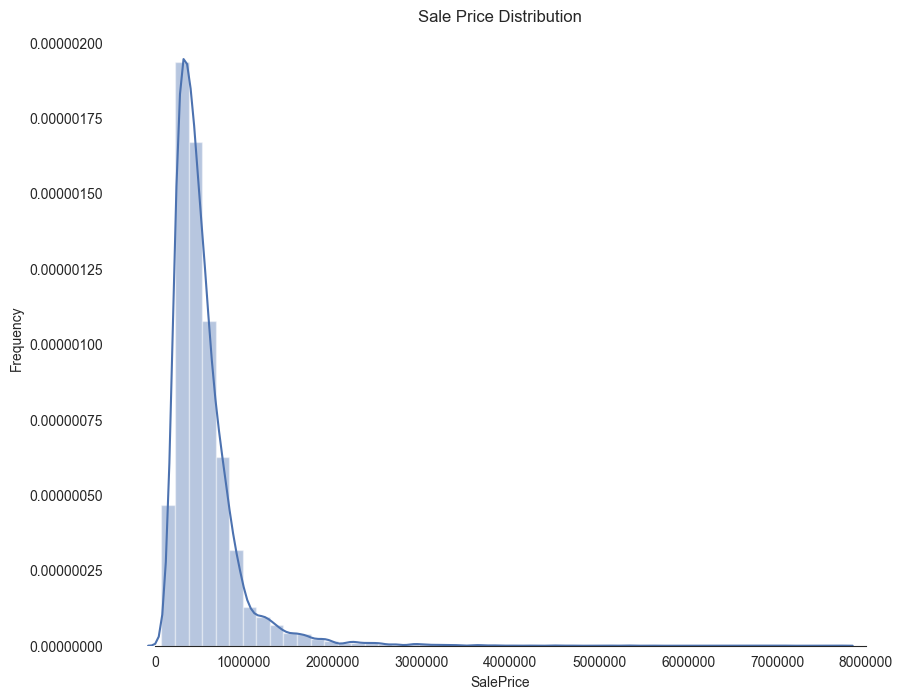

In [47]:
sns.set_style('white')
sns.set_color_codes(palette='deep')
f, ax=plt.subplots(figsize=(10, 8))

sns.distplot(df['price'], color='b')
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='Sale Price Distribution')
ax.ticklabel_format(style='plain')
sns.despine(trim=True, left=True)
plt.show()

It looks like the price data is not normally distributed. Most of prices is between 75000 to 2,500,000. However, there are some houses priced even 8 million. let's see its skewness and kurtosis then.

In [48]:
print('skewness: %f' % df['price'].skew())
print('kurtosis: %f' % df['price'].kurt())

skewness: 4.024069
kurtosis: 34.585540


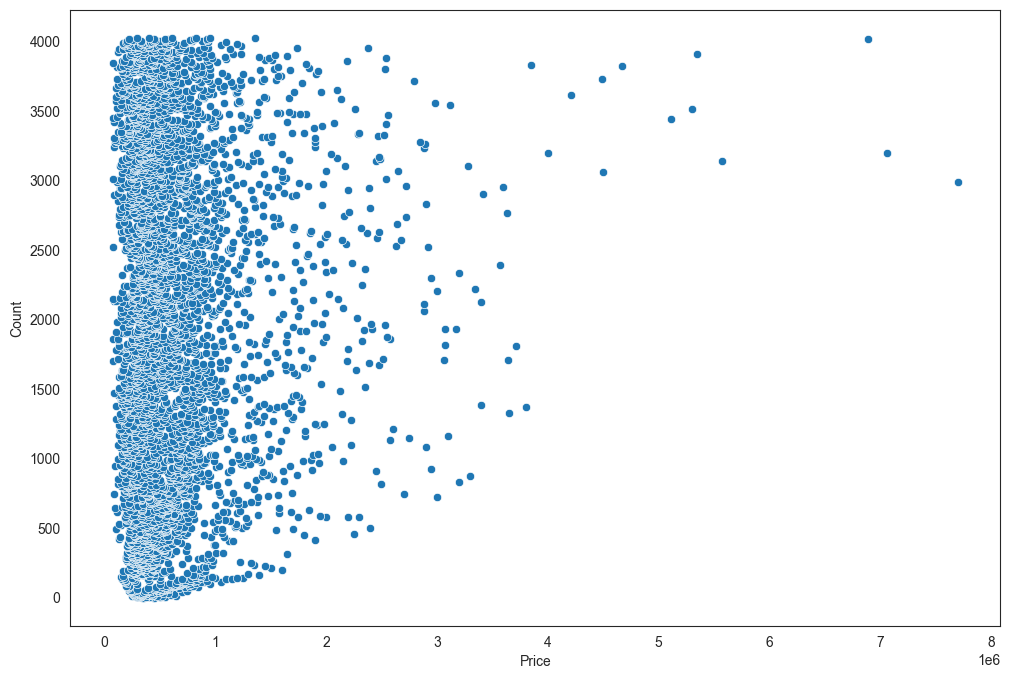

In [58]:
df_price=df['price'].value_counts().to_frame()
df_price=df_price.reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_price, x=df_price.price, y=df_price.index)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


This graph shows that there some outliers that needs to be taken care of. 

### Dealing with outliers

All the prices above 4 million are dropped.

In [117]:
df=df[df['price']<4000000]

### Univariate Analaysis

<Axes: xlabel='bedrooms', ylabel='price'>

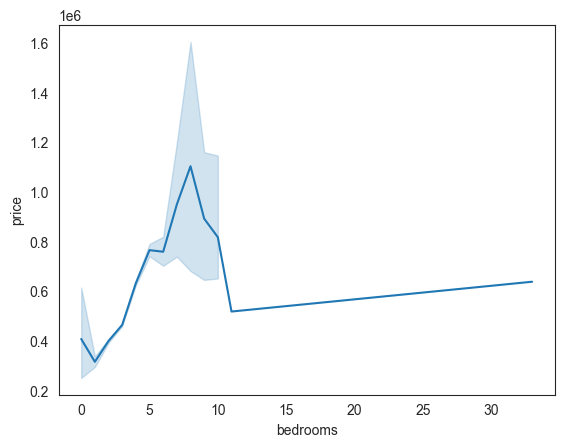

In [118]:
sns.lineplot(data=df, x='bedrooms', y='price')

From the graph we can see that there is a postive relationship bewteen the price and bedroom but it is not very strong and constant. To some extend, as the number of bedroom goes higher, so does the price. 

<Axes: xlabel='bathrooms', ylabel='price'>

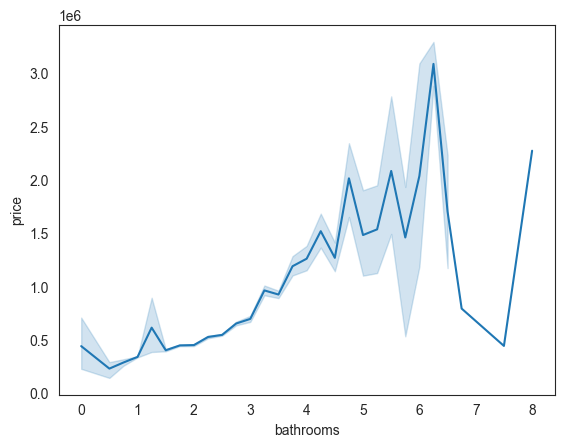

In [119]:
sns.lineplot(data=df, x='bathrooms', y='price')

Price has a postive relationship with number of bathrooms. 

<Axes: xlabel='sqft_living', ylabel='price'>

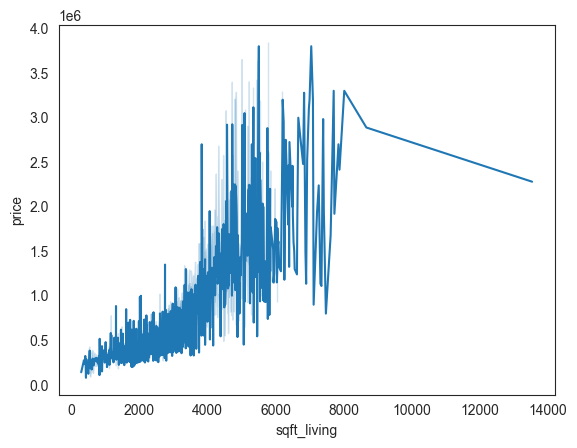

In [120]:
sns.lineplot(data=df, x='sqft_living', y='price')

There is also a positive relationship between price and sqrt_living.

(-0.5, 4.5, 0.0, 800000.0)

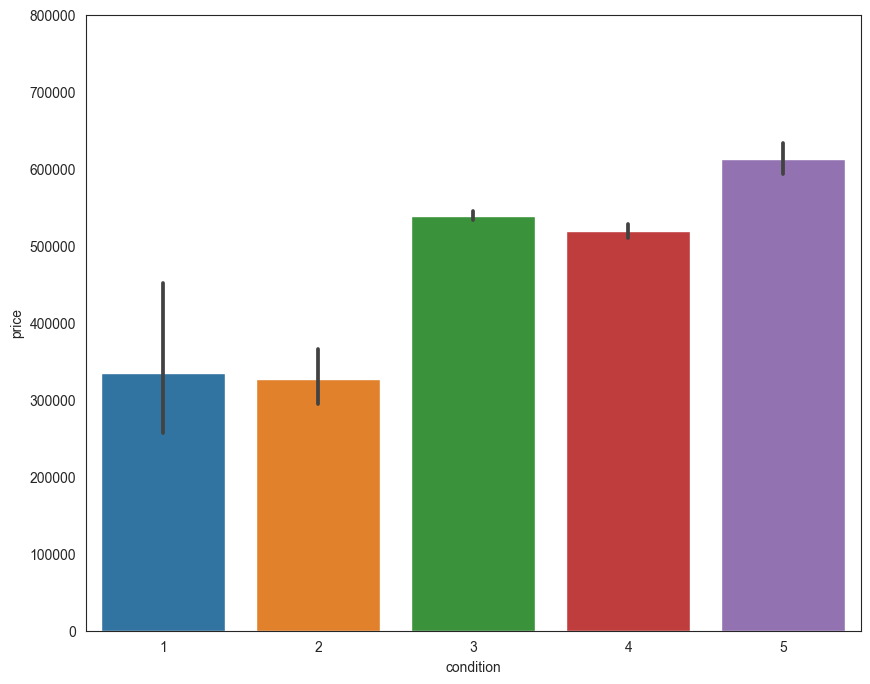

In [121]:
fig, ax=plt.subplots(figsize=(10, 8))
fig=sns.barplot(x=df['condition'], y=df['price'], data=df)
fig.axis(ymin=0, ymax=800000)
     

The relationship between price and condition is positive but not very strong. 

(-0.5, 11.5, 0.0, 800000.0)

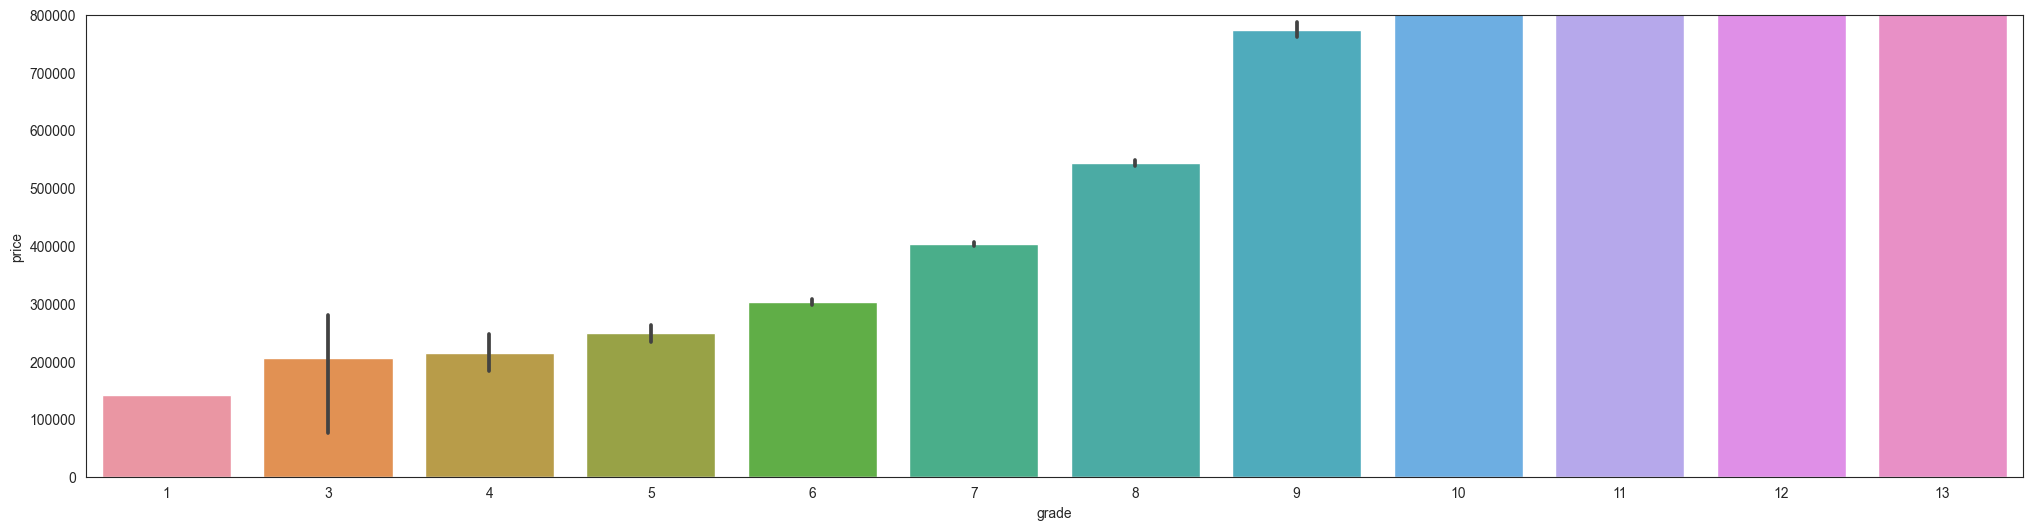

In [122]:
fig, ax=plt.subplots(figsize=(25, 6))
fig=sns.barplot(x=df['grade'], y=df['price'], data=df)
fig.axis(ymin=0, ymax=800000)

Condition which represents the overall quality of the house has a direct relationship with the price.

In [182]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.310735,0.519993,0.694319,0.091991,0.264071,0.248895,0.397505,0.040848,0.677447,0.598728,0.054091,0.597765,0.084416
bedrooms,0.310735,1.000000,0.514724,0.578117,0.031389,0.174740,-0.011951,0.076433,0.028748,0.354820,0.476660,0.153985,0.389997,0.028905
bathrooms,0.519993,0.514724,1.000000,0.751353,0.087536,0.502053,0.053044,0.181340,-0.125127,0.662011,0.681283,0.508612,0.566589,0.086915
sqft_living,0.694319,0.578117,0.751353,1.000000,0.174075,0.355816,0.088527,0.278085,-0.058351,0.761810,0.874651,0.321411,0.758408,0.184737
sqft_lot,0.091991,0.031389,0.087536,0.174075,1.000000,-0.005391,0.020839,0.074418,-0.008883,0.113399,0.184192,0.053009,0.144459,0.718550
floors,0.264071,0.174740,0.502053,0.355816,-0.005391,1.000000,0.022578,0.028345,-0.263781,0.458353,0.526116,0.489478,0.279220,-0.011441
waterfront,0.248895,-0.011951,0.053044,0.088527,0.020839,0.022578,1.000000,0.397837,0.017771,0.074987,0.060343,-0.027698,0.081747,0.030266
view,0.397505,0.076433,0.181340,0.278085,0.074418,0.028345,0.397837,1.000000,0.046562,0.247204,0.160538,-0.054391,0.277744,0.072230
condition,0.040848,0.028748,-0.125127,-0.058351,-0.008883,-0.263781,0.017771,0.046562,1.000000,-0.144539,-0.158634,-0.361300,-0.092538,-0.003315
grade,0.677447,0.354820,0.662011,0.761810,0.113399,0.458353,0.074987,0.247204,-0.144539,1.000000,0.754037,0.447796,0.711934,0.119056


## Baseline Model

In [123]:
X=df.drop(['price'], axis=1)
y=df['price']

In [124]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [125]:
model=Ridge()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

206611.75887240953

From the baseline model, we can conclude that model accuracy is very low. Let's conduct some feature engineerings to see if it improves the model accuracy. 

## Feature Engineering

As some columns, like Bedrooms, bathrooms, floors, waterfront, view, condition, and grade, are categorical, their dummies can be created.

In [143]:
df_feature_engineering=pd.get_dummies(data=df, columns=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'], dtype=int)

Let's find the imporance of each feature for price through heatmap graph. 


<Axes: >

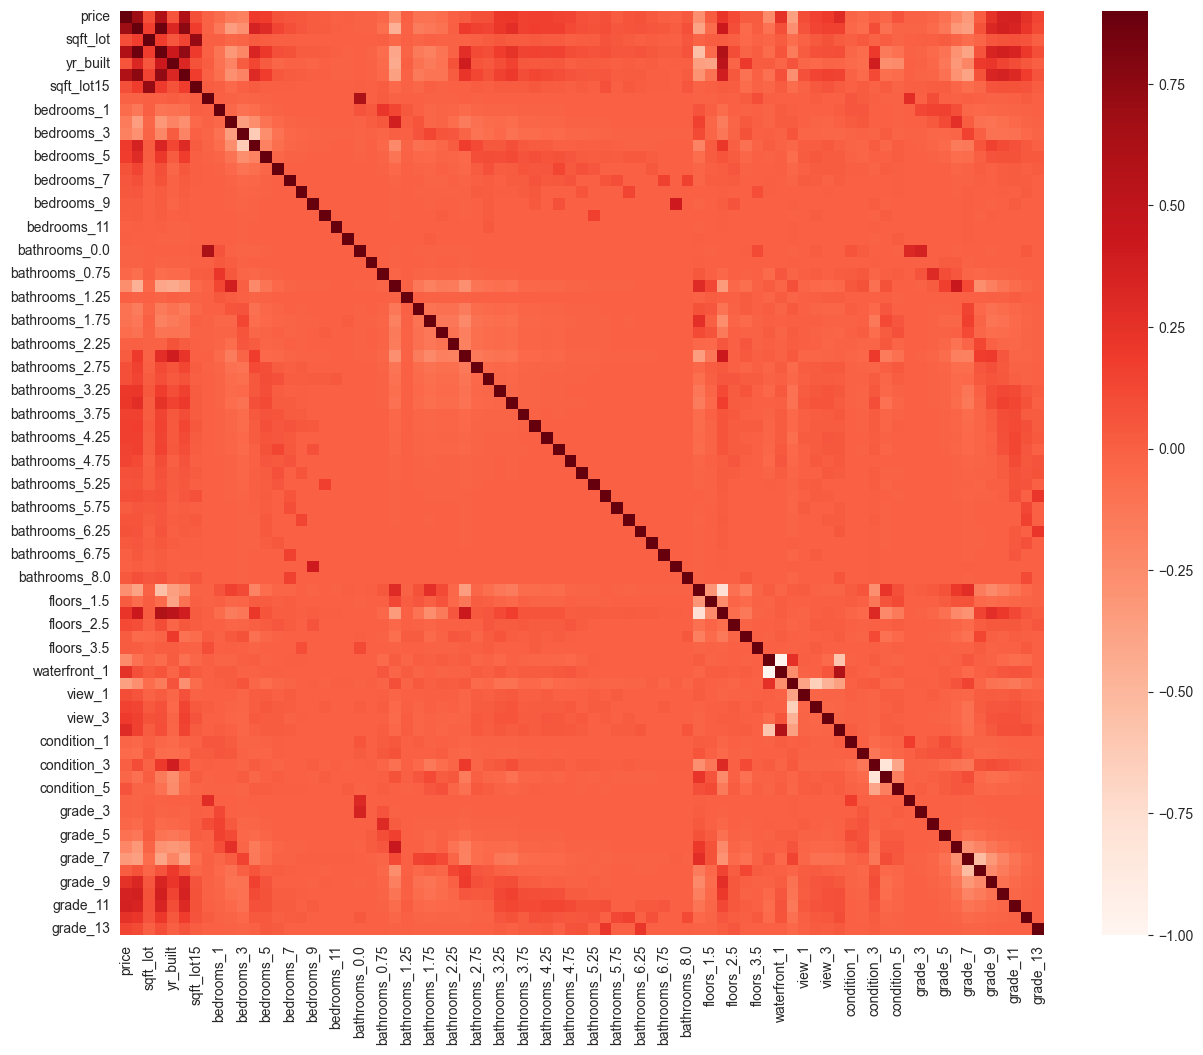

In [145]:
corr=df_feature_engineering.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=0.9, cmap='Reds', square=True)

## Training the model after feature engineering

In [151]:
X=df_feature_engineering.drop(['price'], axis=1)
y=df_feature_engineering['price']

### Ridge

In [148]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)
model=Ridge()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

195269.21907854057

## Lasso

In [149]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)
model=Lasso()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+13, tolerance: 2.078e+11
  model = cd_fast.enet_coordinate_descent(


194896.13057777108

Lasso performs a little better than Ridge.


After analyzing the dataset and building regression models, here are the key findings regarding the main drivers of house prices in King City and their impact on the price:

### Data Cleaning and Feature Engineering:

- Unnecessary columns such as date, id, zipcode, latitude, and longitude were dropped from the dataset.
- Missing values were checked, and some columns were removed due to a high percentage of missing or irrelevant values.
- Categorical columns like waterfront, view, condition, and grade were identified and dummy variables were created for them.
- Outliers with prices above 4 million were dropped from the dataset.

### Model Selection and Evaluation:

- Two regression models, Ridge and Lasso, were built to predict house prices based on the provided data.
- Ridge regression was chosen as it works well when there are many variables in the dataset and helps in reducing multicollinearity.
- Lasso regression was also used as it performs feature selection by shrinking coefficients to zero, which can be beneficial in identifying the most important predictors.
- The models were evaluated using the root mean squared error (RMSE) metric, which measures the average difference between predicted and actual house prices.
- The RMSE was calculated for both models on the test dataset.

### Results and Interpretation:

- The baseline model (Ridge regression) yielded a low accuracy, indicating that the initial set of features was not sufficient for accurate predictions.
- Feature engineering was performed by creating dummy variables for relevant categorical columns, which improved the model's accuracy.
- The correlation heatmap revealed the importance of these engineered features, indicating a strong relationship with house prices.
- The final model (Lasso regression) provided a slightly better accuracy compared to Ridge regression. However, further evaluation and fine-tuning of the model might be necessary to achieve higher accuracy.

#### The main drivers of house prices in King City, based on the analysis, include:

- Square footage of living space (sqft_living): There is a positive relationship between the size of the living space and the house price. As the square footage increases, the price tends to increase as well.
-  Number of bathrooms: The price tends to increase with the number of bathrooms in a house.
- Condition and grade: The overall condition and quality of the house have a direct relationship with the price. Higher condition and grade ratings result in higher prices.
- Bedrooms: While there is a positive relationship between the number of bedrooms and the price, it is not a strong and constant relationship. Other factors play a more significant role in determining house prices in King City.

It is important to note that these are the main drivers identified in this analysis, but other factors such as location, amenities, neighborhood characteristics, and market trends may also influence house prices. The impact of these drivers on the price can vary, and further analysis or domain expertise might be required to provide a more comprehensive understanding of the housing market in King City.